**Install Packages**

In [1]:
!pip install uv
!uv pip install pyod --system

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 22.9 MB/s eta 0:00:00
Using Python 3.10.12 environment at /usr
Resolved 18 packages in 1.37s
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
Building pyod==2.0.2
   Built pyod==2.0.2
Prepared 1 package in 6.86s
Installed 1 package in 6ms
 + pyod==2.0.2


**Import Packages**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Generate Dataset**

In [3]:
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
contamination = 0.25  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features
X_train, X_test, y_train, y_test = generate_data(
   n_train=n_train, n_test=n_test,
   n_features= n_features,
   contamination=contamination,random_state=12)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

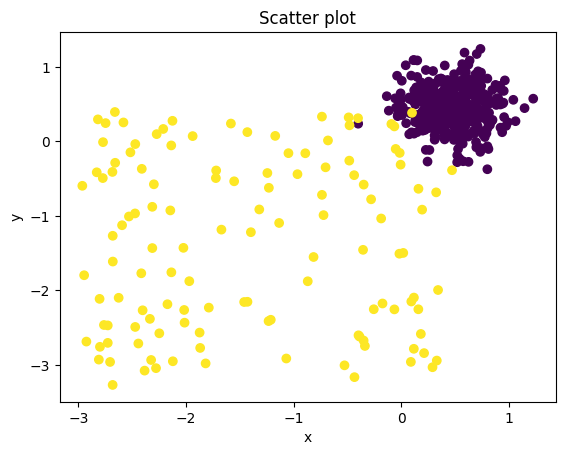

In [4]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
cdict = {0: 'red', 1: 'blue'}
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=y_train, alpha=1)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Train Autoencoder**

In [5]:
clf = AutoEncoder(hidden_neuron_list=[25, 2, 2, 25])
clf.fit(X_train)

Training: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]


In [6]:
# Get the outlier scores for the train data
y_train_scores = clf.decision_scores_
# Predict the anomaly scores
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [7]:
y_test_scores

array([ 2.1573236,  2.897223 ,  2.7417877,  2.4982646,  2.10141  ,
        2.6062255,  2.3469455,  2.7906978,  2.519348 ,  2.6721172,
        2.1625934,  2.3383272,  2.731161 ,  2.3722684,  2.2913969,
        1.9857674,  1.9709094,  2.636422 ,  2.4116814,  2.2962253,
        2.6846194,  2.704756 ,  1.9225354,  2.8738275,  2.5648985,
        2.3245792,  2.1514819,  2.7013028,  2.6514878,  2.4393566,
        2.6952882,  2.5739572,  2.887026 ,  2.3093507,  2.6639411,
        2.6173265,  2.4202492,  2.5351548,  2.465216 ,  2.5178127,
        2.7436056,  2.6102772,  2.4067414,  2.588235 ,  2.8151696,
        2.551556 ,  2.3940866,  2.34897  ,  2.505963 ,  2.4433482,
        2.9295683,  2.5152233,  2.6268125,  2.4321535,  2.276302 ,
        2.6557224,  2.7448828,  2.4699275,  2.171012 ,  2.404172 ,
        2.6064622,  2.1068897,  2.3824472,  2.6455042,  2.26457  ,
        2.3128188,  2.3102398,  2.9056237,  2.2124083,  2.6582997,
        2.458572 ,  2.5937877,  2.2213948,  2.8150656,  2.8397

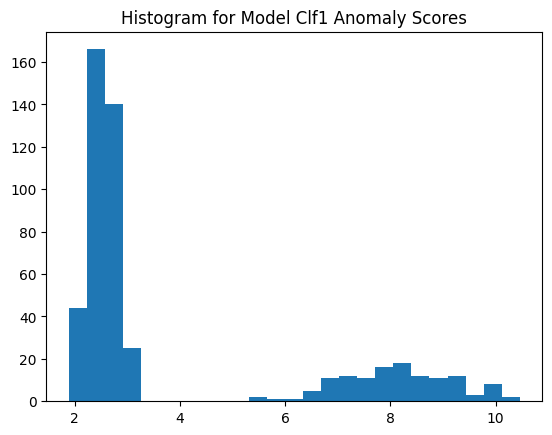

In [8]:
y_test_scores = pd.Series(y_test_scores)
# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [9]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<4, 0, 1)
df_test['cluster'].value_counts()
df_test.groupby('cluster').mean()

cluster_labels = np.array(df_test['cluster'])
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

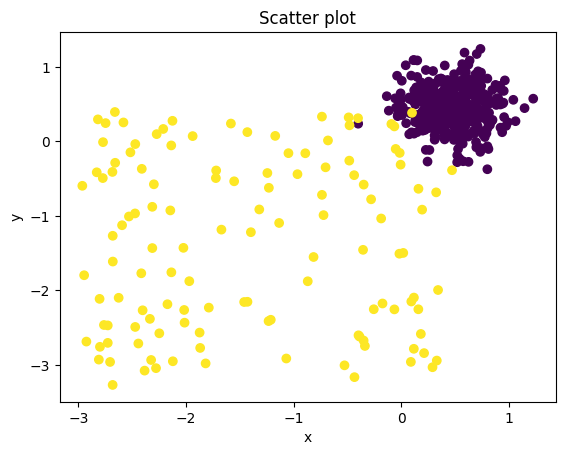

In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
cdict = {0: 'red', 1: 'blue'}
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=y_train, alpha=1)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

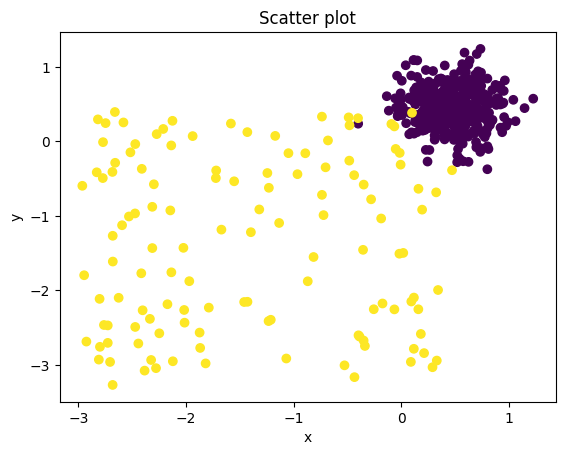

In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
cdict = {0: 'red', 1: 'blue'}
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], c=cluster_labels, alpha=1)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Clustering Quality Metrics**

In [13]:
np.all(cluster_labels == y_train)

True

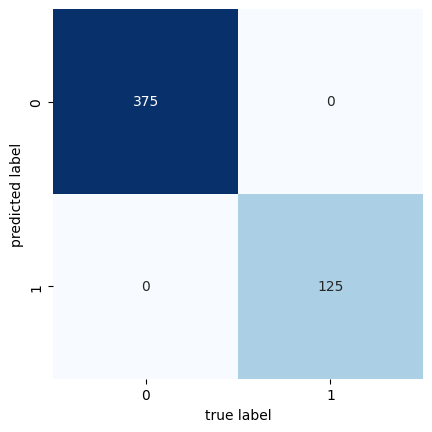

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_train, cluster_labels, labels=[0,1])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, cluster_labels)

1.0